In [71]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.ticker as mtick

In [72]:
K = 10
STEPS = 10000
EPSILON = 0.1
NUM_RUNS = 2000
ALPHA = [lambda a, N: 1/N[a] if N[a] != 0 else 0,
         lambda a, N: 0.1]

In [100]:
def kArmedTestBed(stepSize):
  N = np.zeros(K)
  Q = np.zeros(K, dtype=np.float32)
  q_a = np.zeros(K, dtype=np.float32)
  R_t = []
  opt_action = np.zeros(STEPS)

  for i in range(STEPS):
    if np.random.random() <= EPSILON:
      a = np.random.choice(K)
    else:
      a = np.random.choice(np.where(Q == np.amax(Q))[0])

    opt_action[i] = 1 if a == np.argmax(q_a) else 0
    R = np.random.normal(loc=q_a[a], scale=1, size=1)[0]
    R_t.append(R)
    q_a += np.random.normal(loc=0, scale=0.01, size=K)

    Q[a] += (R - Q[a]) * stepSize(a, N)
    N[a] += 1
  return R_t, opt_action

In [101]:
run_rewards = np.zeros((len(ALPHA), STEPS))
run_opt_actions = np.zeros((len(ALPHA), STEPS))
for alpha_idx in range(len(ALPHA)):
  rewards_sum = np.zeros(STEPS)
  opt_actions_sum = np.zeros(STEPS)
  for i in tqdm(range(NUM_RUNS)):
    rewards, opt_actions = kArmedTestBed(ALPHA[alpha_idx])
    rewards_sum += rewards
    opt_actions_sum += opt_actions
  run_rewards[alpha_idx, :] = rewards_sum / NUM_RUNS
  run_opt_actions[alpha_idx, :] = opt_actions_sum / NUM_RUNS


100%|██████████| 2000/2000 [13:01<00:00,  2.56it/s]


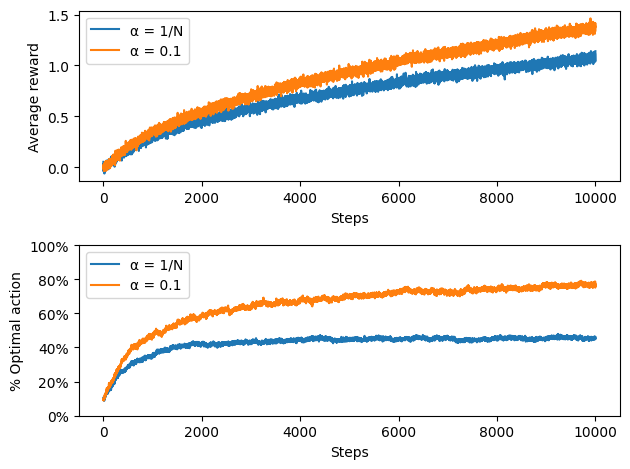

In [106]:
fig, ax = plt.subplots(2, 1)

x = np.arange(1, STEPS+1)

## Average Reward ##
for alpha_idx in range(len(ALPHA)):
  ax[0].plot(x, run_rewards[alpha_idx])
ax[0].set_xlabel("Steps")
ax[0].set_ylabel("Average reward", rotation=90)
# ax[0].ylim((0, 1.6))
ax[0].legend(("α = 1/N", "α = 0.1"))
ax[0].grid(False)

## Optimal Action ##
for alpha_idx in range(len(ALPHA)):
  ax[1].plot(x, run_opt_actions[alpha_idx])
ax[1].set_xlabel("Steps")
ax[1].set_ylabel("% Optimal action", rotation=90)
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax[1].set_ylim((0, 1))
ax[1].legend(("α = 1/N", "α = 0.1"))
ax[1].grid(False)

plt.tight_layout()
plt.savefig('ex2_5.png', dpi=300, bbox_inches='tight')
plt.show()